In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm
plt.rcParams["figure.figsize"] = (20,5)
random.seed(42)
np.random.seed(42)

In [2]:
plt.rcParams["figure.figsize"] = (20,5)

In [3]:
# constants
age = 0
married = 1
sex = 2
name = 3
alive = 4

male = 0
female = 1

In [4]:
def poluhovich_percent(selo):
    alive_selo = selo[:,selo[alive] == 1]
    poluhovich = alive_selo[:,alive_selo[name] == 0]
    percent = 100 * poluhovich.shape[1]/alive_selo.shape[1]
    return percent

def draw_statistics(selo):
    print(f"Poluhovich percentage: {poluhovich_percent(selo)}")
    
    aliveFilter = selo[alive] == 1
    ax1=plt.subplot(2, 3, 1)
    ax1.hist(selo[:,aliveFilter][age,:])
    ax1.set_title('age')
    ax2=plt.subplot(2, 3, 2)
    ax2.hist(selo[:,aliveFilter][married,:])
    ax2.set_title('married')
    ax3=plt.subplot(2, 3, 3)
    ax3.hist(selo[:,aliveFilter][sex,:])
    ax3.set_title('sex')
    ax4=plt.subplot(2, 3, 4)
    ax4.hist(selo[:,aliveFilter][name,:])
    ax4.set_title('name')
    ax5=plt.subplot(2, 3, 5)
    ax5.hist(selo[alive,:])
    ax5.set_title('alive')
    plt.show()

In [5]:



# draw_statistics(curr_selo)

In [6]:
def run_simulation(poluhovich_init_percent = 0.74074074074):
    # Init conditions
    deathAge = 60
    initCount = 2700
    poluhovichCount = math.ceil(initCount* poluhovich_init_percent)
    propability_to_get_married = 0.3
    init_birth_propability = 0.051
    normalsCount = initCount - poluhovichCount
    normals = norm.ppf(np.random.random(normalsCount), loc=50, scale=10).astype(int)
    
    def process_year(selo):
        # + 1 year
        selo[age] += 1
        # old people die
        selo[alive] = selo[age] <= deathAge
    
    #     recalculate filters
        singlesFilter = selo[married] == 0
        maleFilter = selo[sex] == male
        femaleFilter = selo[sex] == female
        aliveFilter = selo[alive] == 1
        matureFilter = selo[age] >= 18
        marriedFilter = selo[married] == 1
    
    #     stabilize population
        if selo[:,aliveFilter].shape[1] > 1 * initCount:
            birth_propability = 0.5 * init_birth_propability
        else:
            if selo[:,aliveFilter].shape[1] < 0.9 * initCount:
                birth_propability = 2 * init_birth_propability
            else: 
                birth_propability = init_birth_propability
    
    
        # People get married
        single_females = np.argwhere(singlesFilter * femaleFilter * aliveFilter * matureFilter).flatten()
        single_males = np.argwhere(singlesFilter * maleFilter * aliveFilter * matureFilter).flatten()
        availableSinglePairs = math.ceil(min(single_females.shape[0], single_males.shape[0])*propability_to_get_married)
        mated_females = single_females[-availableSinglePairs:]
        mated_males = single_males[-availableSinglePairs:]
        np.random.shuffle(mated_males)
        selo[name, mated_females] = selo[name, mated_males]
        selo[married, mated_females] = 1
        selo[married, mated_males] = 1
    
        # children are born
        married_females = np.argwhere(marriedFilter * aliveFilter * femaleFilter)
        np.random.shuffle(married_females)
        children_count = math.ceil(married_females.shape[0] * birth_propability)
        children = np.ndarray((5, children_count))
        agesArr = np.zeros(children_count)
        marriedArr = np.zeros(children_count)
        sexArr = np.random.randint(0,2, children_count)
        aliveArr = np.ones(children_count)
        nameArr = selo[name, married_females[-children_count:]].reshape(children_count)
        children[age,:] = agesArr
        children[married,:] = marriedArr
        children[sex,:] = sexArr
        children[alive,:] = aliveArr
        children[name,:] = nameArr
        selo = np.append(selo, children, axis=1)
        return selo[:, selo[alive] == 1]

    curr_selo = np.ndarray((5, initCount))
    agesArr = np.random.randint(0,deathAge - 1, initCount)
    marriedArr = np.random.randint(0,2, initCount)
    sexArr = np.random.randint(0,2, initCount)
    nameArr = np.zeros(initCount,dtype=np.int32)
    aliveArr = np.ones(initCount)
    nameArr[:normalsCount] = normals
    curr_selo[age,:] = agesArr
    curr_selo[married,:] = marriedArr
    curr_selo[sex,:] = sexArr
    curr_selo[name,:] = nameArr
    curr_selo[alive,:] = aliveArr
    percents = []
    population = []
    for j in tqdm(range(10000)):
        curr_selo = process_year(curr_selo)
        percents.append([j, poluhovich_percent(curr_selo)])
        population.append([j,curr_selo[:,curr_selo[alive] == 1].shape[1]])
        if (j % 100 == 0):
            pass
#         draw_statistics(curr_selo)

    percentsT = np.array(percents).T
    populationT = np.array(population).T
    
    return percentsT

100%|██████████| 10000/10000 [00:20<00:00, 486.35it/s]


68


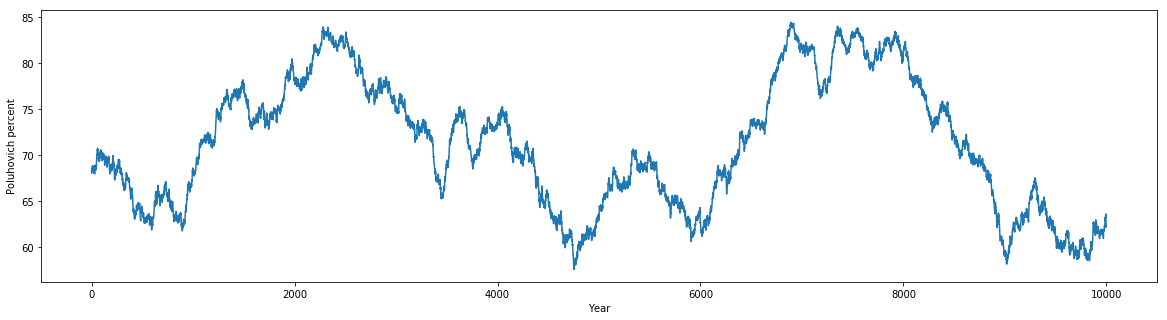

100%|██████████| 10000/10000 [00:20<00:00, 483.61it/s]


70


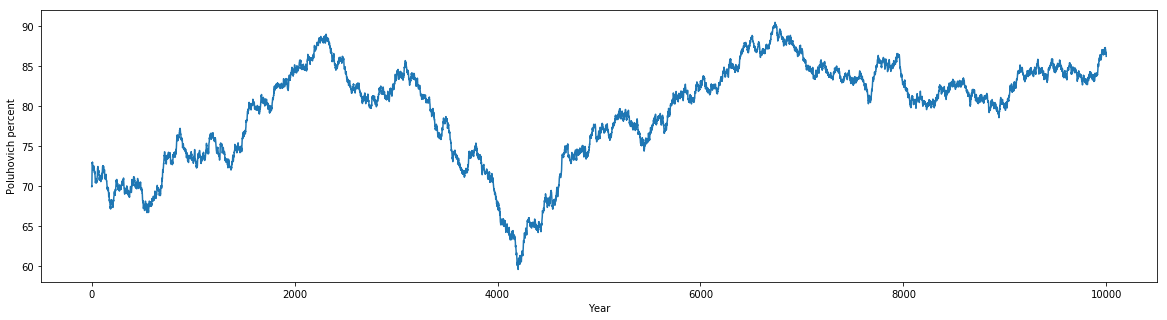

100%|██████████| 10000/10000 [00:20<00:00, 486.55it/s]


72


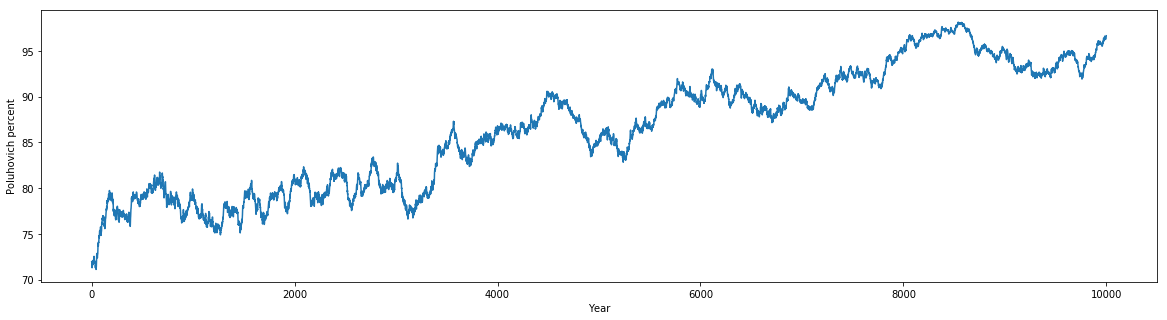

100%|██████████| 10000/10000 [00:21<00:00, 476.17it/s]


74


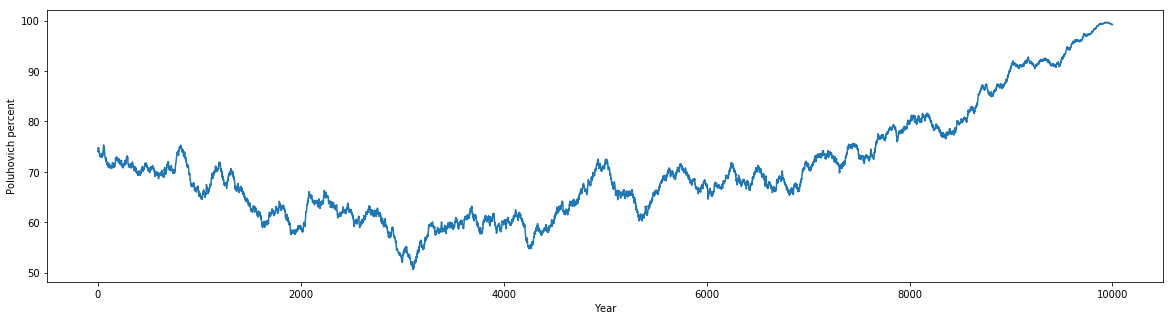

100%|██████████| 10000/10000 [00:20<00:00, 485.62it/s]


76


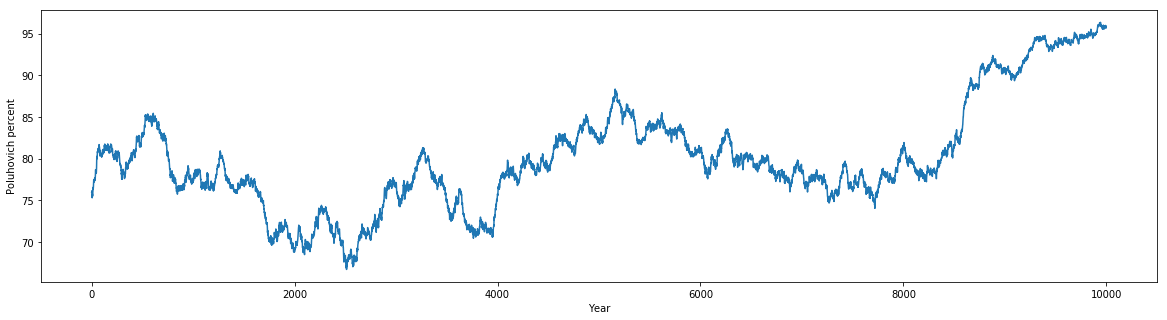

100%|██████████| 10000/10000 [00:20<00:00, 477.22it/s]


78


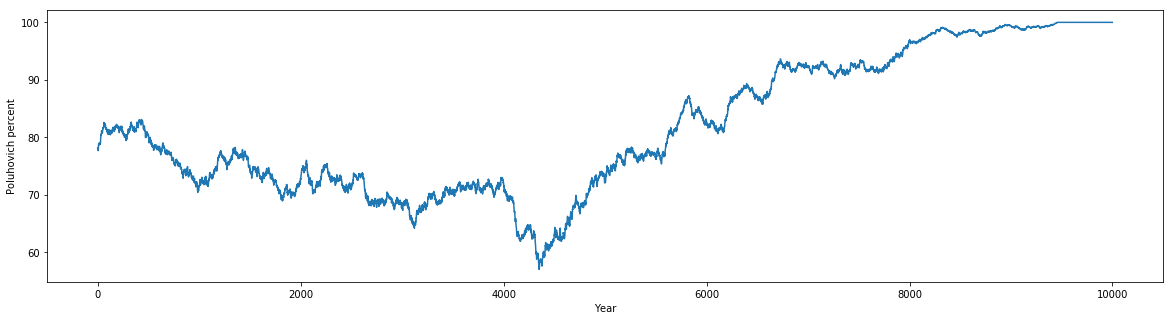

100%|██████████| 10000/10000 [00:20<00:00, 479.37it/s]


80


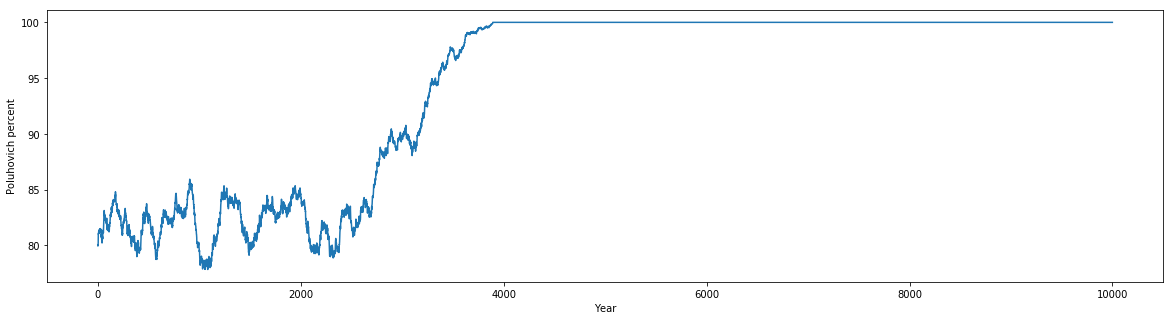

100%|██████████| 10000/10000 [00:21<00:00, 475.40it/s]


82


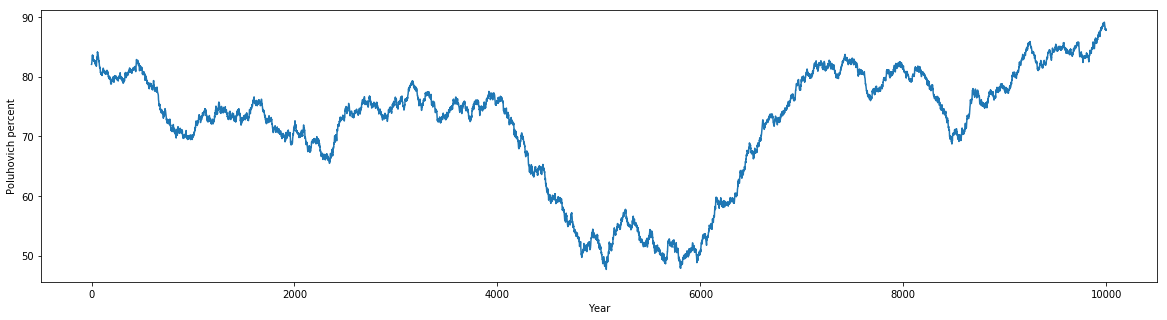

100%|██████████| 10000/10000 [00:20<00:00, 479.23it/s]


84


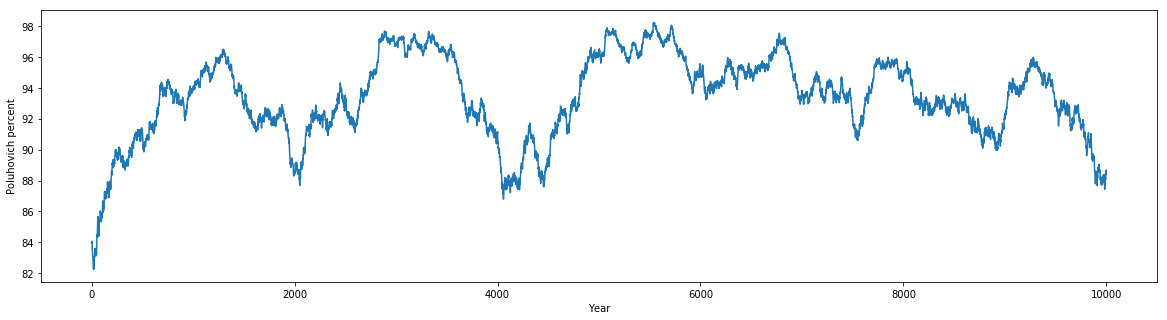

100%|██████████| 10000/10000 [00:20<00:00, 484.62it/s]


86


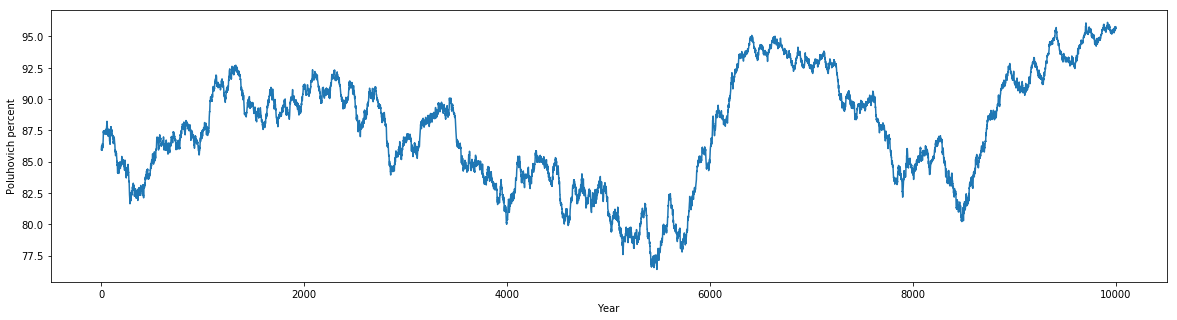

100%|██████████| 10000/10000 [00:20<00:00, 482.02it/s]


88


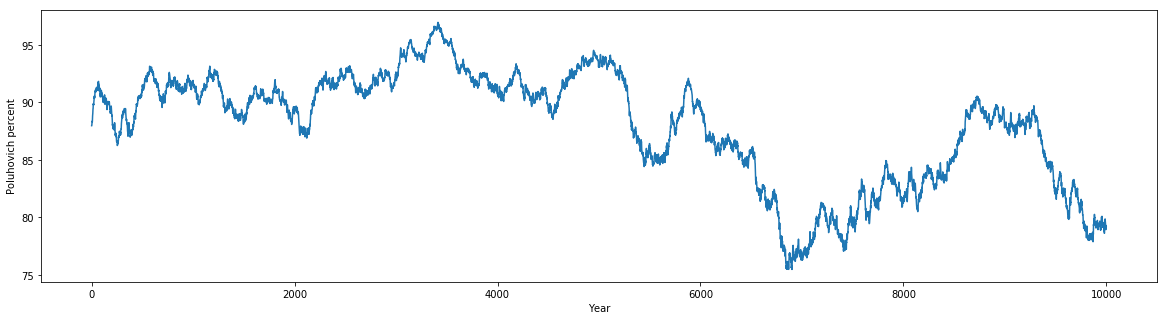

100%|██████████| 10000/10000 [00:21<00:00, 473.59it/s]


90


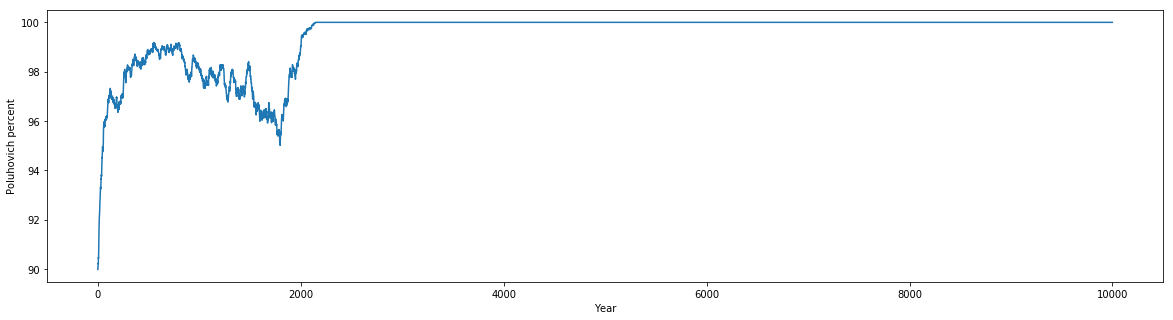

100%|██████████| 10000/10000 [00:20<00:00, 482.19it/s]


92


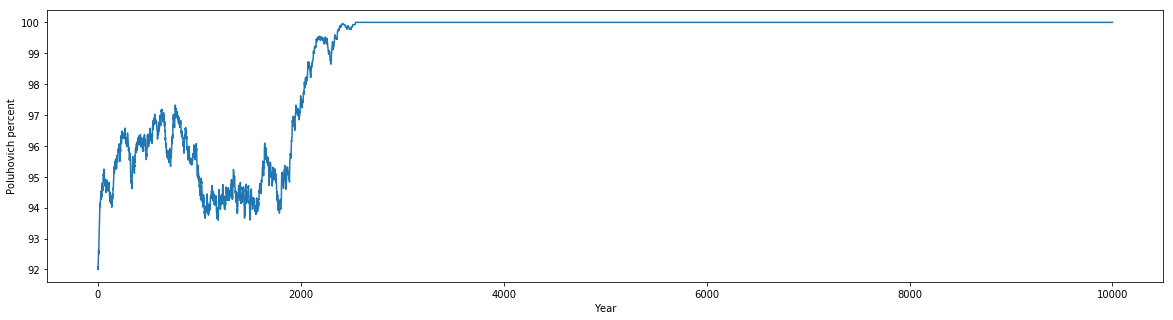

100%|██████████| 10000/10000 [00:20<00:00, 481.97it/s]


94


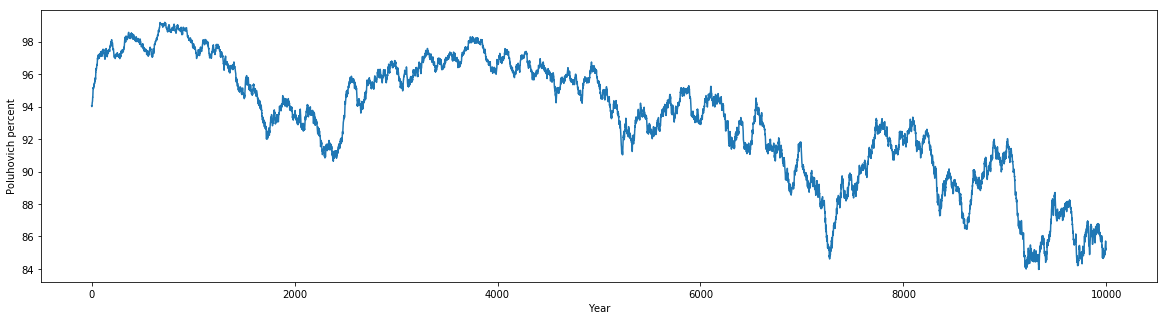

100%|██████████| 10000/10000 [00:20<00:00, 476.70it/s]


96


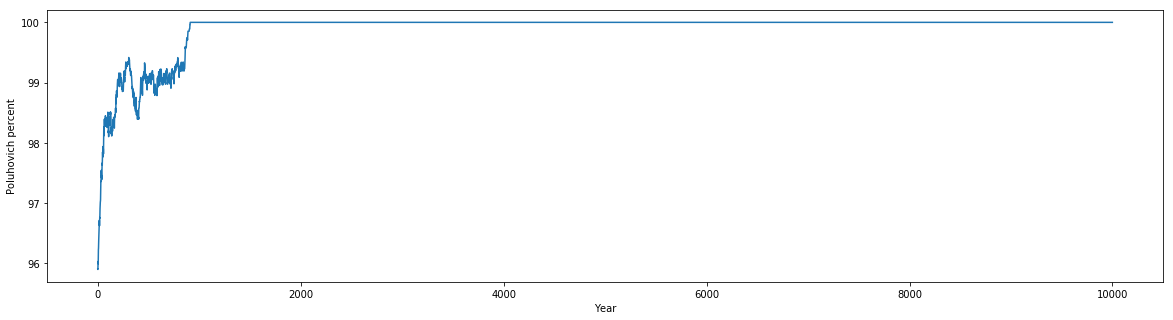

In [8]:
result = []
for pers in range(68, 98, 2):
    for i in range(10):
        sym_result = run_simulation(pers/100)
        result.append([pers, sym_result])
    print(pers)
    fig, ax1 = plt.subplots()
    ax1.plot(sym_result[0,:], sym_result[1,:])
    ax1.set_ylabel('Poluhovich percent')
    ax1.set_xlabel('Year')
    plt.show()

Poluhovich percent at start: 68
Max seen percentage was 100.0


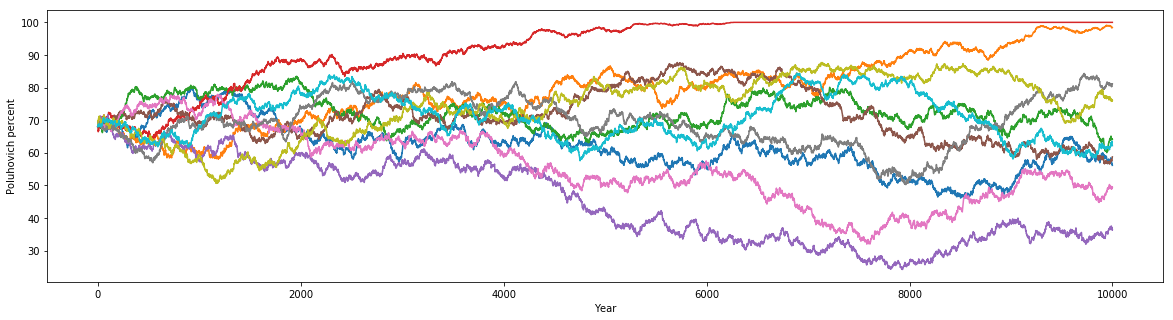

Poluhovich percent at start: 70
Max seen percentage was 97.29729729729729


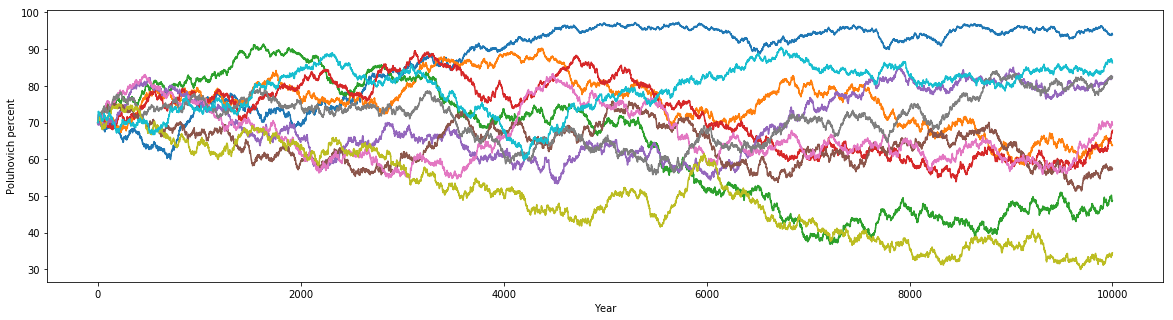

Poluhovich percent at start: 72
Max seen percentage was 100.0


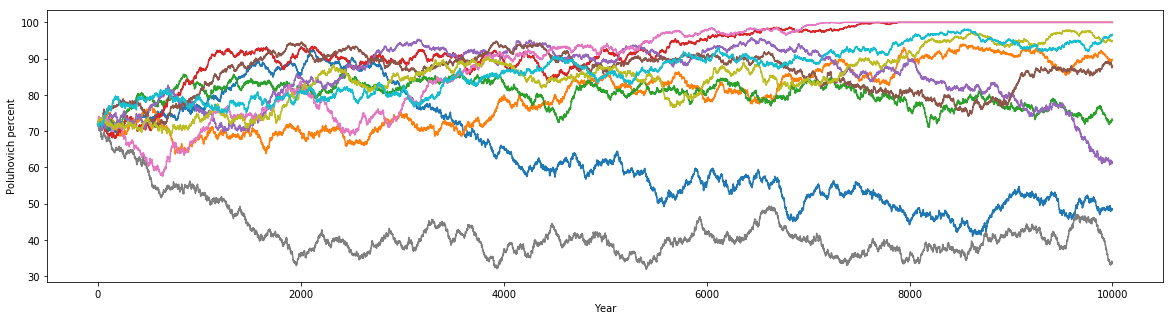

Poluhovich percent at start: 74
Max seen percentage was 100.0


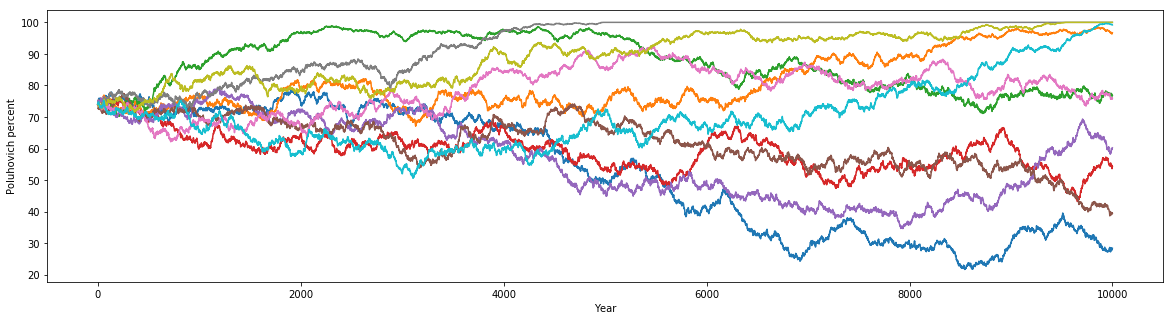

Poluhovich percent at start: 76
Max seen percentage was 99.92695398100804


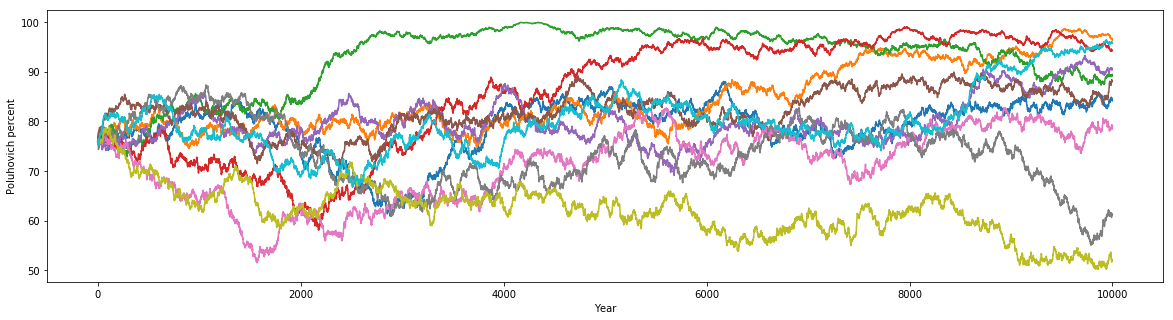

Poluhovich percent at start: 78
Max seen percentage was 100.0


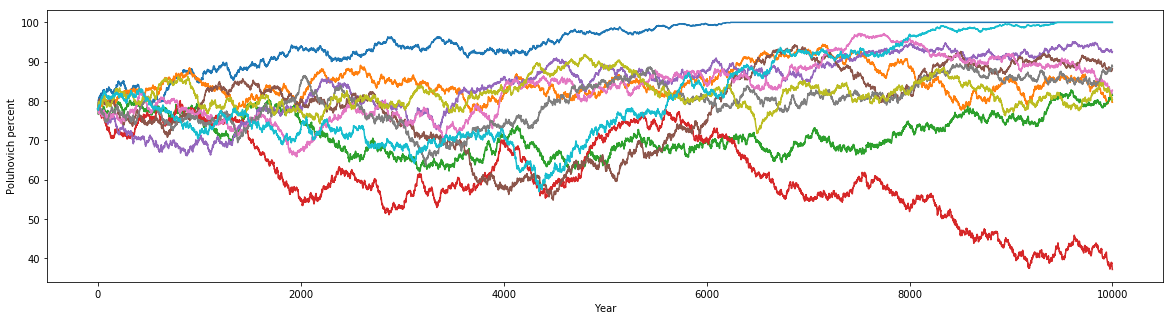

Poluhovich percent at start: 80
Max seen percentage was 100.0


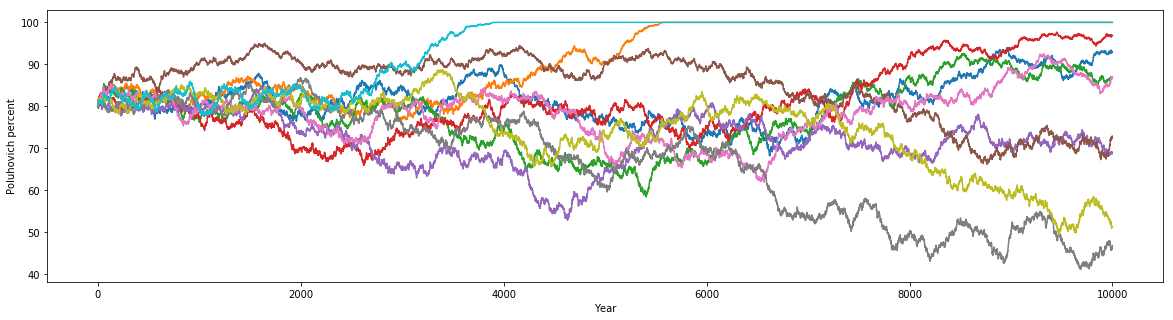

Poluhovich percent at start: 82
Max seen percentage was 100.0


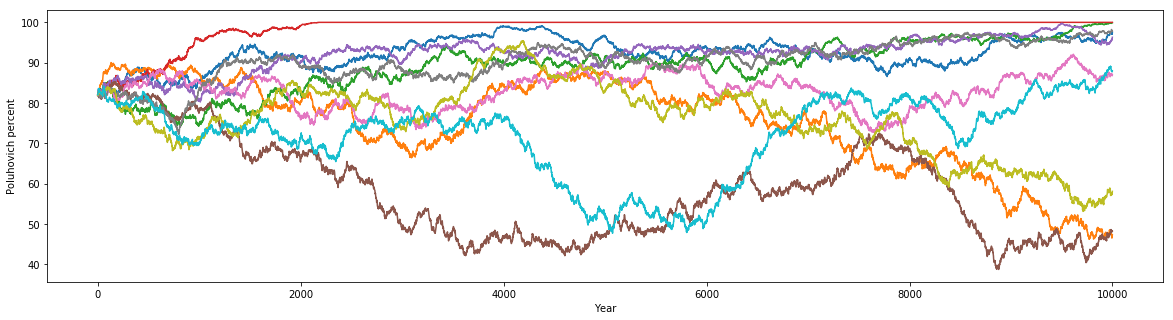

Poluhovich percent at start: 84
Max seen percentage was 100.0


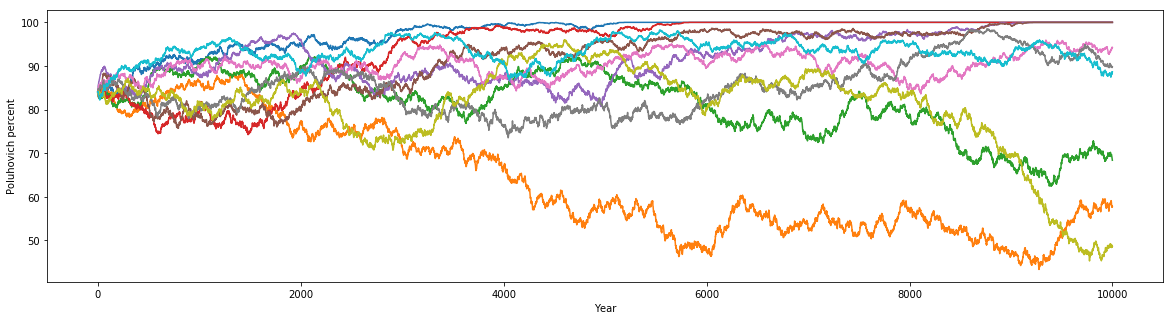

Poluhovich percent at start: 86
Max seen percentage was 100.0


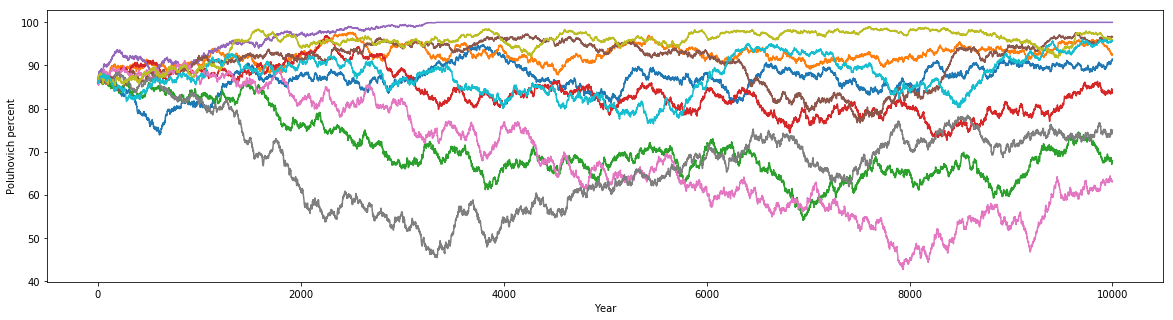

Poluhovich percent at start: 88
Max seen percentage was 100.0


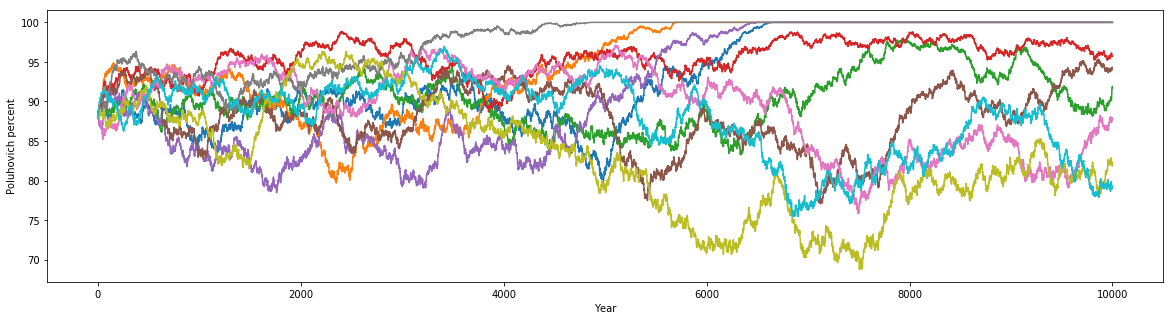

Poluhovich percent at start: 90
Max seen percentage was 100.0


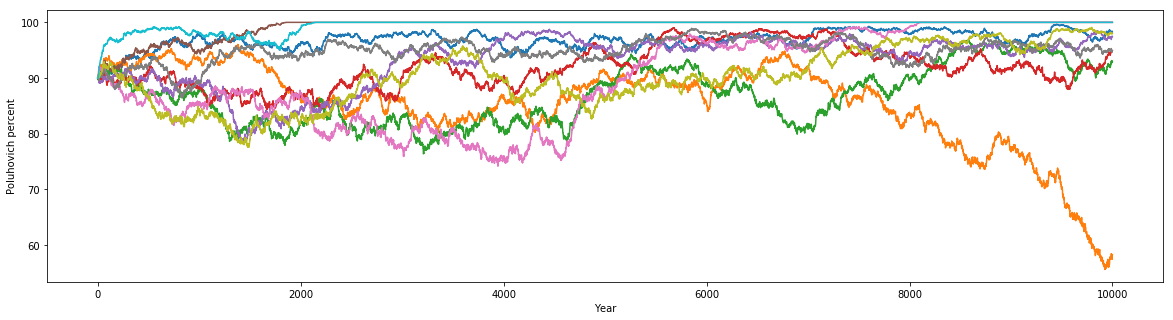

Poluhovich percent at start: 92
Max seen percentage was 100.0


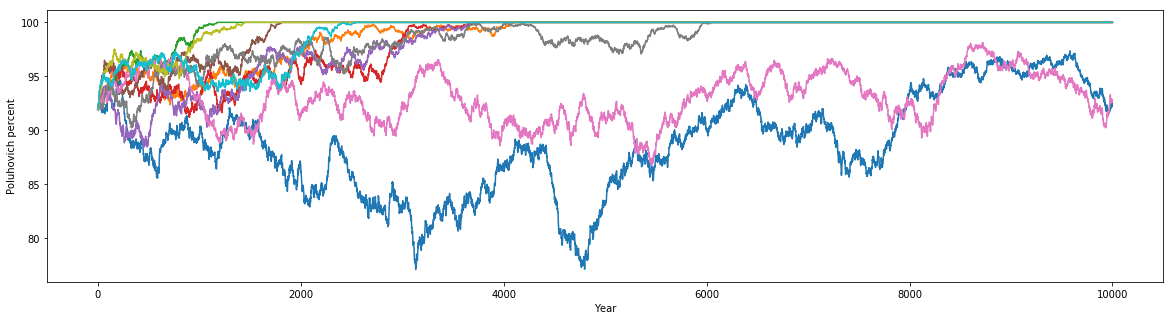

Poluhovich percent at start: 94
Max seen percentage was 100.0


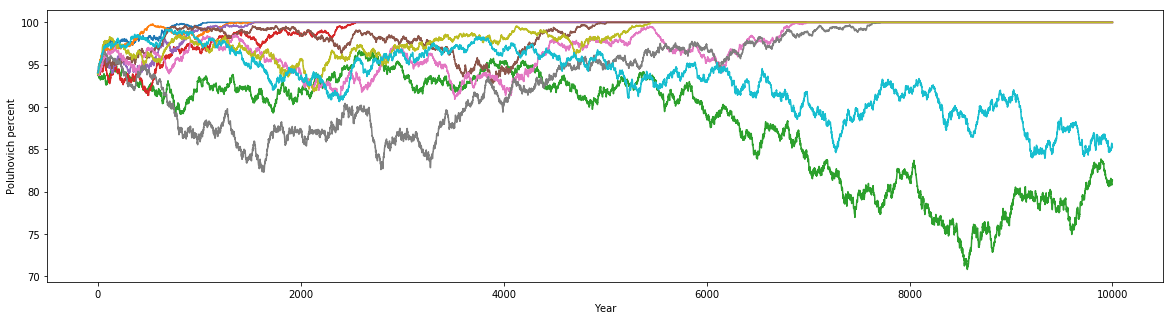

Poluhovich percent at start: 96
Max seen percentage was 100.0


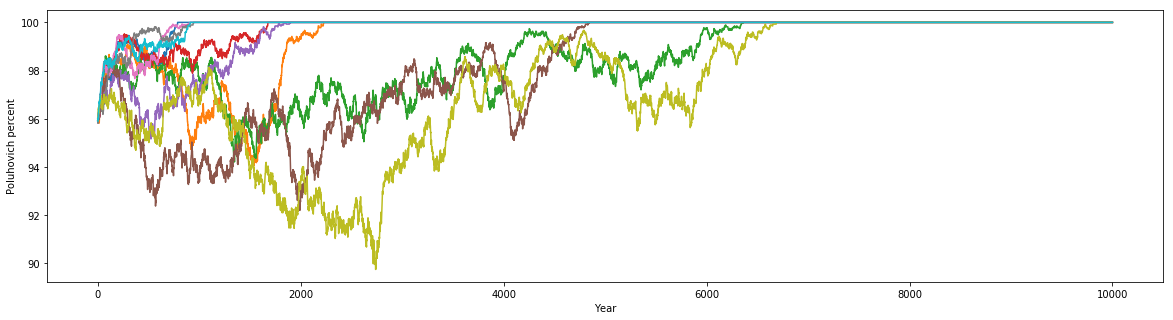

In [16]:
for pers in range(68, 98, 2):
    res2 = list(map(lambda x: x[1],list(filter(lambda tup: tup[0] == pers,result))))
    fig, ax1 = plt.subplots()
    print(f"Poluhovich percent at start: {pers}")
    maxper = 0
    for res1 in res2:
        ax1.plot(res1[0,:], res1[1,:])
        maxper = max(maxper, res1[1,:].max())
    ax1.set_ylabel('Poluhovich percent')
    ax1.set_xlabel('Year')
    print(f"Max seen percentage was {maxper}")
    plt.show()

In [ ]:
for i in range(100):
    